In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_data = pd.read_csv('winequality-red.csv')
csv_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


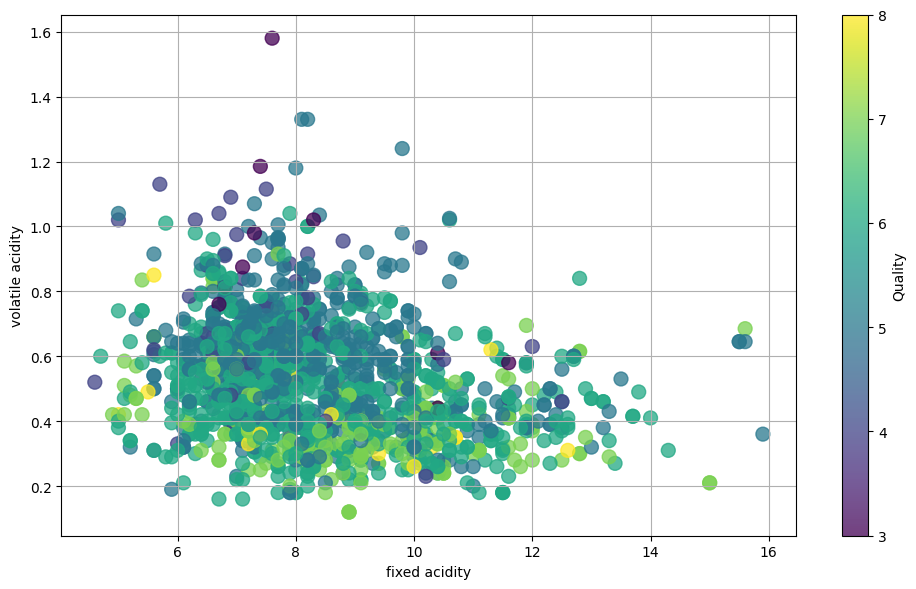

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(csv_data['fixed acidity'], csv_data['volatile acidity'], s=100, c=csv_data['quality'], cmap="viridis", alpha=0.75)
plt.colorbar(label='Quality')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.grid(True)
plt.tight_layout()

plt.show()

In [5]:
X = csv_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y = csv_data[['quality']]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

In [8]:
# Model
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier()

In [10]:
clf

DecisionTreeClassifier()

In [11]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
y_predicted = clf.predict(x_test)
y_predicted

array([5, 5, 6, ..., 6, 5, 6], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score as ac

In [14]:
accuracy = ac(y_test, y_predicted)
accuracy

0.53125

In [15]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [16]:
rfc = rfc()
rfc.fit(x_train, y_train)

C:\Users\VAGHELA VISHVJIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [17]:
y_predicted_rfc = rfc.predict(x_test)
y_predicted_rfc

array([5, 5, 6, ..., 6, 5, 6], dtype=int64)

In [18]:
accuracy_rfc = ac(y_predicted_rfc, y_test)
accuracy_rfc

0.5953125

In [19]:
from sklearn.model_selection import cross_val_score, KFold

In [20]:
kf = KFold(n_splits=500, shuffle=True, random_state=42)
kf

KFold(n_splits=500, random_state=42, shuffle=True)

In [21]:
cross_val_model = cross_val_score(clf, X, Y, cv=kf)

In [22]:
cross_val_model

array([0.25      , 1.        , 0.25      , 0.25      , 0.75      ,
       0.75      , 0.75      , 0.75      , 1.        , 0.25      ,
       0.5       , 0.25      , 1.        , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.75      , 0.25      ,
       0.75      , 1.        , 0.25      , 0.75      , 0.5       ,
       1.        , 0.75      , 0.25      , 0.5       , 0.5       ,
       0.25      , 0.5       , 0.75      , 0.75      , 1.        ,
       0.75      , 0.75      , 0.75      , 1.        , 0.75      ,
       0.75      , 0.25      , 0.5       , 1.        , 0.5       ,
       0.75      , 0.5       , 0.5       , 0.75      , 1.        ,
       0.75      , 0.5       , 0.75      , 0.5       , 0.75      ,
       0.5       , 0.75      , 0.25      , 0.5       , 0.75      ,
       0.75      , 0.75      , 0.5       , 0.25      , 0.25      ,
       0.25      , 0.75      , 1.        , 0.5       , 0.25      ,
       0.75      , 1.        , 0.5       , 0.75      , 0.5    

In [23]:
cross_val_model.mean()

0.6481666666666667

In [24]:
cross_val_model_rfc = cross_val_score(rfc, X, Y, cv=kf)
cross_val_model_rfc

C:\Users\VAGHELA VISHVJIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\VAGHELA VISHVJIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\VAGHELA VISHVJIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\VAGHELA VISHVJIT\AppData\Local\Programs\Python\Python312\Lib\sit

array([0.5       , 1.        , 0.5       , 0.25      , 0.5       ,
       1.        , 0.25      , 1.        , 1.        , 0.25      ,
       0.75      , 1.        , 1.        , 0.5       , 0.5       ,
       0.        , 0.25      , 0.5       , 0.75      , 0.5       ,
       0.75      , 0.75      , 0.25      , 1.        , 1.        ,
       0.75      , 1.        , 0.75      , 0.25      , 1.        ,
       1.        , 0.5       , 0.75      , 0.75      , 1.        ,
       0.75      , 1.        , 0.75      , 0.75      , 0.5       ,
       0.25      , 0.5       , 0.75      , 1.        , 0.75      ,
       0.5       , 0.25      , 0.75      , 0.5       , 1.        ,
       0.5       , 0.5       , 0.75      , 0.5       , 1.        ,
       0.75      , 0.75      , 1.        , 0.75      , 0.75      ,
       0.75      , 0.5       , 0.75      , 0.75      , 0.5       ,
       0.5       , 0.5       , 1.        , 0.75      , 0.75      ,
       0.75      , 1.        , 0.25      , 0.75      , 0.5    

In [25]:
cross_val_model_rfc.mean()

0.7221666666666666